# Druglikeness

In the previous notebook, we played with the concept of molecular descriptors, and compared our sets of known ligands to known therapeutic drugs contained in the DrugBank database, using several common descriptors. This already gave you some information on how do your selected ligands compare to known drugs.

While we can compare the two sets any which way, there are also some widely established rules of thumb for identifying [drug-like](https://en.wikipedia.org/wiki/Druglikeness) structures, i.e. small molecules that have a chance to be reasonably potent, selective, and, above all, able to reach the therapeutic target (receptor) when [ingested](https://en.wikipedia.org/wiki/Bioavailability). Nobody wants to inject their medication into theirs veins, unless absolutely necessary. More on biological availability [here](http://howmed.net/pharmacology/bioavailability-of-drugs/).

The most known set of rules for biological availability is the Lipinski's [rule of five](https://en.wikipedia.org/wiki/Lipinski%27s_Rule_of_Five) (LRO5). It states that molecules can be expected to have good bioavailability when:
 - no more than 5 hydrogen bond donors
 - no more than 10 hydrogen bond acceptors
 - molecular weight of less than 500 Da
 - logP less than 5

The above are just general rules of thumb, to avoid excesively large, greasy molecules that would have serious problems getting to the target in a real organism. In most applications, molecules that violate only one of the aforedescribed rules still get a passing mark. A more complex insight on LRO5 can be read [here](https://blogs.sciencemag.org/pipeline/archives/2005/02/14/bigger_and_greasier). I would recommend reading dr. Lowe's stuff in general to get some idea about drug discover/development from pharma chemist's perspective. Since there is no sense of me reiterating anymore of what is already readily available on your materials from lectures and also from Wikipedia, let's try and implement this filter on our own:

Druglikeness
V předchozím zápisníku jsme si hráli s konceptem molekulárních deskriptorů a pomocí několika běžných deskriptorů jsme porovnávali naše sady známých ligandů se známými terapeutickými léky obsaženými v databázi DrugBank. Toto vám již poskytlo několik informací o tom, jak jsou vaše vybrané ligandy ve srovnání se známými léky.

I když můžeme tyto dvě sady libovolně porovnat, existují také některá široce zavedená pravidla pro identifikaci struktur podobných lékům, tj. Malých molekul, které mají šanci být přiměřeně silné, selektivní a především schopné dosáhnout terapeutický cíl (receptor) při požití. Nikdo nechce vstříknout své léky do žil, pokud to není nezbytně nutné. Více o biologické dostupnosti zde.

Nejznámějším souborem pravidel pro biologickou dostupnost je Lipinskiho pravidlo pěti (LRO5). Uvádí, že lze očekávat, že molekuly budou mít dobrou biologickou dostupnost, když:

- ne více než 5 dárců vodíkových vazeb
- ne více než 10 akceptorů vodíkových vazeb
- molekulová hmotnost menší než 500 Da
- logP méně než 5

Výše uvedené jsou pouze obecná pravidla, aby se zabránilo nadměrně velkým, mastným molekulám, které by měly vážné problémy dostat se k cíli ve skutečném organismu. Ve většině aplikací dostávají molekuly, které porušují pouze jedno z výše popsaných pravidel, známku. Složitější pohled na LRO5 si můžete přečíst zde. Doporučil bych si přečíst dr. Loweovy věci obecně k získání nějaké představy o objevování / vývoji léků z pohledu farmaceutického chemika. Protože už nemám smysl, abych znovu opakoval to, co je již snadno dostupné na vašich materiálech z přednášek a také z Wikipedie, zkusme tento filtr implementovat sami:

# What to do
 - Have a look at Lipinski and other filters, linked in the workflow
 - Implement the rules, either as done here, or by other methods of your preference. Please try not to just copypaste the solution, and make sure that you understand what is being done. I can't freeze frame the classroom projector here, so honor system only :)
 - Run the filters on your set, evaluate the results, compare with MTOR results, and with DrugBank
 - How many ligands in your set fail the filters, what is their ratio?
 - What rules are the most frequently failed ones? 
 - How does the absolute numbers, as well as failure rate of individual rules compare to MTOR ligands and DrugBank?
 - Finally, to not just copypaste code, also look at lead-likeness filter, which is even more stringent than drug-likeness one (LogP 3 or less, molecular weight below 300 Da, max 3 HBA, max 3 HBD, and no more than 3 rotatable bonds). It is more strict so that there is some extra space for pharmaceutical lead to be further developed for specificity and/or potency by adding additional groups without the molecule getting too large and greasy. Implement this filter much like the Lipinski or Ghose one, and perform the corresponding visualizations. How many of your known ligands have lead-like properties that would make them good candidates for further drug development? How do the already developed drugs in DrugBank fare against your filter?

- Podívejte se na Lipinski a další filtry propojené v pracovním postupu
- Pravidla implementujte buďto zde, nebo jinými preferovanými metodami. Pokuste se řešení nejen zkopírovat a vložit a ujistěte se, že rozumíte tomu, co se děje. Zde nemůžu zmrazit rám projektoru ve třídě, takže jen čestný systém :)
- Spusťte filtry na vaší sadě, vyhodnoťte výsledky, porovnejte s výsledky MTOR a s DrugBank
- Kolik ligandů ve vaší sadě selže ve filtrech, jaký je jejich poměr?
- Jaká pravidla jsou nejčastěji neúspěšná?
- Jak jsou absolutní čísla a míra selhání jednotlivých pravidel v porovnání s ligandy MTOR a DrugBank?
- A konečně, nejen kód copypaste, podívejte se také na filtr podobnosti olova, který je ještě přísnější než filtr podobnosti s drogami (LogP 3 nebo méně, molekulová hmotnost nižší než 300 Da, max 3 HBA, max 3 HBD a ne více než 3 otočné vazby). Je přísnější, takže existuje další prostor pro další vývoj farmaceutického olova pro specifičnost a / nebo účinnost přidáním dalších skupin, aniž by molekula byla příliš velká a mastná. Implementujte tento filtr podobně jako Lipinski nebo Ghose a proveďte odpovídající vizualizace. Kolik z vašich známých ligandů má vlastnosti podobné olovu, díky nimž by se stali dobrými kandidáty na další vývoj léků? Jak si proti vašemu filtru vedou již vyvinuté léky v DrugBank?

In [51]:
from rdkit.Chem import AllChem as Chem
from rdkit.Chem import Descriptors
from rdkit.Chem import rdMolDescriptors as rdescriptors
from rdkit.Chem.Draw import IPythonConsole

import csv
import pandas as pd

import seaborn as sns

# let's have a look at the csv:
raw_df = pd.read_csv('data/cyclooxygenase_1.csv', sep=';') 
raw_df.head()

# odstraneni dat, ktere nemaji IC50 nebo maji jinou jednotku nez nM,
# tim se odstrani data, ktere nemaji Smiles
df = raw_df[(raw_df['Standard Units'] == 'nM')]
print(len(df.index))
print(df.isnull().sum())
cox_ligands = [Chem.MolFromSmiles(smiles) for smiles in df['Smiles']]

3193
Molecule ChEMBL ID               0
Molecule Name                 2669
Molecule Max Phase               0
Molecular Weight                 0
#RO5 Violations                  0
AlogP                            0
Compound Key                     0
Smiles                           0
Standard Type                    0
Standard Relation                0
Standard Value                   0
Standard Units                   0
pChEMBL Value                 1295
Data Validity Comment         2924
Comment                       3154
Uo Units                         0
Ligand Efficiency BEI         1436
Ligand Efficiency LE          1436
Ligand Efficiency LLE         1436
Ligand Efficiency SEI         1436
Potential Duplicate              0
Assay ChEMBL ID                  0
Assay Description                0
Assay Type                       0
BAO Format ID                    0
BAO Label                        0
Assay Organism                   0
Assay Tissue ChEMBL ID           0
Assay Tissue Na

In [52]:
def too_many_hbd(mol):
    # takes an RDKit mol instance, returns True if the structure is out of LRO5 bounds
    return rdescriptors.CalcNumLipinskiHBD(mol) > 5

def too_many_hba(mol):
    return rdescriptors.CalcNumLipinskiHBA(mol) > 10

def too_heavy(mol):
    return rdescriptors.CalcExactMolWt(mol) > 500

def too_greasy(mol):
    return Descriptors.MolLogP(mol) > 5

Podívejme se na nějakou náhodnou strukturu z naší sady a zkusme použít naše filtry:

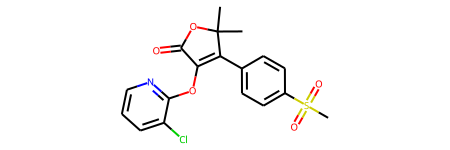

In [53]:
cox_ligands[400]

In [54]:
# and see how the structure fares
too_many_hbd(cox_ligands[400]), too_many_hba(cox_ligands[400]), \
too_heavy(cox_ligands[400]), too_greasy(cox_ligands[400])

(False, False, False, False)

Takže pro náš 400 ligant nehlásí lipinského pravidlo 5 žádnou chybu. Zdá se, že je biologicky dostupný.

Vyhodnocení lipinského pravidla 5 pro celou sadu:

In [56]:
cox_ligands_too_many_hbd = [too_many_hbd(l) for l in cox_ligands]
cox_ligands_too_many_hba = [too_many_hba(l) for l in cox_ligands]
cox_ligands_too_heavy = [too_heavy(l) for l in cox_ligands]
cox_ligands_too_greasy = [too_greasy(l) for l in cox_ligands]
print("pocet sloucenin s velkym dhb:\t",sum(cox_ligands_too_many_hbd),"\npocet sloucenin s vetsim hba:\t", sum(cox_ligands_too_many_hba), 
"\npocet tezkych sloucenin:\t",sum(cox_ligands_too_heavy),"\npocet sloucenin s velkym logP:\t", sum(cox_ligands_too_greasy),"\ncelkovy pocet sloucenin:\t", len(cox_ligands))

pocet sloucenin s velkym dhb:	 34 
pocet sloucenin s vetsim hba:	 59 
pocet tezkych sloucenin:	 183 
pocet sloucenin s velkym logP:	 468 
celkovy pocet sloucenin:	 3193


So, from this crude view on data, it looks like most of the 4596 molecules within this mtor set pass the RO5. The biggest problem seems to be that over a quarter of the molecules seem too heavy, and there are also quite a few with too many hydrogen bond acceptors (N, O, other heteroatoms), which should come as no surprise given the results in the previous exercise. On the other hand, greasiness and the amount of hydrogen bond donors do not seem to be much of a factor here. Let's make the data look a bit nicer:

Z tohoto hrubého pohledu na data tedy vypadá, že většina z 3193 molekul v této sadě cox prochází RO5. Největší problém se zdá být to, že 13 5 molekul má logP > 5

In [57]:
df_cox = pd.DataFrame(data={'set':'cox',
                        'too_many_hbd': cox_ligands_too_many_hbd,
                        'too_many_hba': cox_ligands_too_many_hba,
                        'too_greasy': cox_ligands_too_greasy,
                        'too_heavy': cox_ligands_too_heavy})
df_cox

,set,too_many_hbd,too_many_hba,too_greasy,too_heavy
0,cox,False,False,False,False
1,cox,False,False,False,False
2,cox,False,False,False,False
3,cox,False,False,False,False
4,cox,False,False,False,False
...,...,...,...,...,...
3188,cox,False,False,True,False
3189,cox,False,False,True,True
3190,cox,False,False,False,False
3191,cox,False,False,False,False


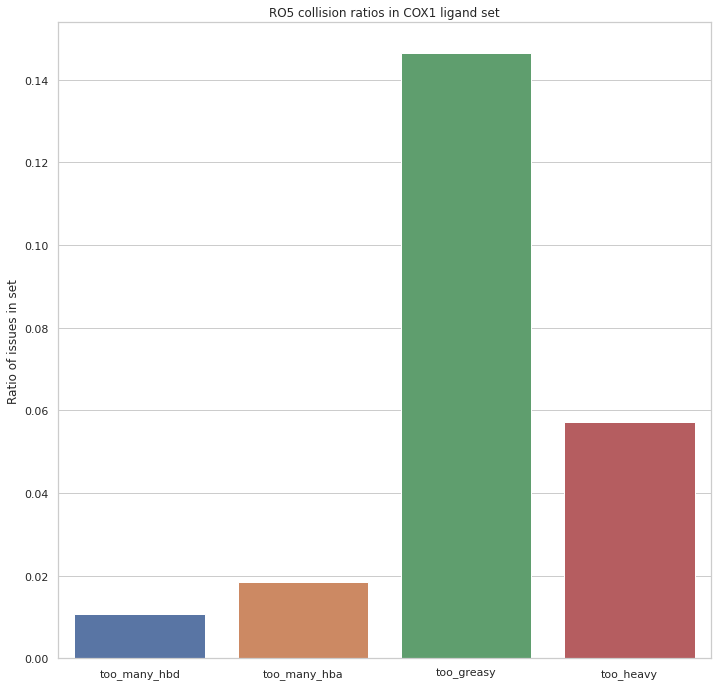

In [58]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7, 11.7)}) # for bigger graphs
with sns.axes_style("whitegrid"):
    p = sns.barplot(data=df_cox, ci=None)
    p.set_title("RO5 collision ratios in COX1 ligand set")
    p.set_ylabel("Ratio of issues in set")

Vizualizovvané stejné data, ukazují problém Lipinského RO5 se sadou cox ligandů.

LRO5 umožňuje porušení jednoho z pravidel. Některé struktury s věším logP stále mohou projít RO5. Implementace:

In [59]:
def ro5_violations(mol):
    # takes RDKit mol, return how many rules it actually violates
    return sum([too_many_hbd(mol), too_many_hba(mol), too_heavy(mol), too_greasy(mol)])

def violates_lipinski(mol):
    # checks the number of RO5 violations, if they are more than one, return True
    return ro5_violations(mol) > 1

In [60]:
# let's apply those functions on our mtor set:
cox_ro5_violations = [ro5_violations(l) for l in cox_ligands]
cox_violates_lipinski = [violates_lipinski(l) for l in cox_ligands]
print("pocet sloucenin porusujicich min 1 pravidlo:\t",sum(cox_ro5_violations),
"\nprocentualne, kolik poruseni na slouceninu\t",sum(cox_ro5_violations)/len(cox_ro5_violations),
"\npocet sloucenin porusujicich > 1 pravidlo\t",sum(cox_violates_lipinski),
"\nprocentualne, kolik poruseni na slouceninu\t",sum(cox_violates_lipinski)/len(cox_violates_lipinski))

pocet sloucenin porusujicich min 1 pravidlo:	 744 
procentualne, kolik poruseni na slouceninu	 0.23300970873786409 
pocet sloucenin porusujicich > 1 pravidlo	 144 
procentualne, kolik poruseni na slouceninu	 0.045098653304102725


Celkové množství porušení RO5 v sadě COX1 je 744, což je přibližně 23 % porušení RO5 na molekulu. 144 COX ligandů, což je asi 5%, porušuje více než jedno pravidlo LRO5, a tím selhává standardní Lipinski filtr. 

přidejme data lipinski pass do datového rámce a znovu vizualizujme:

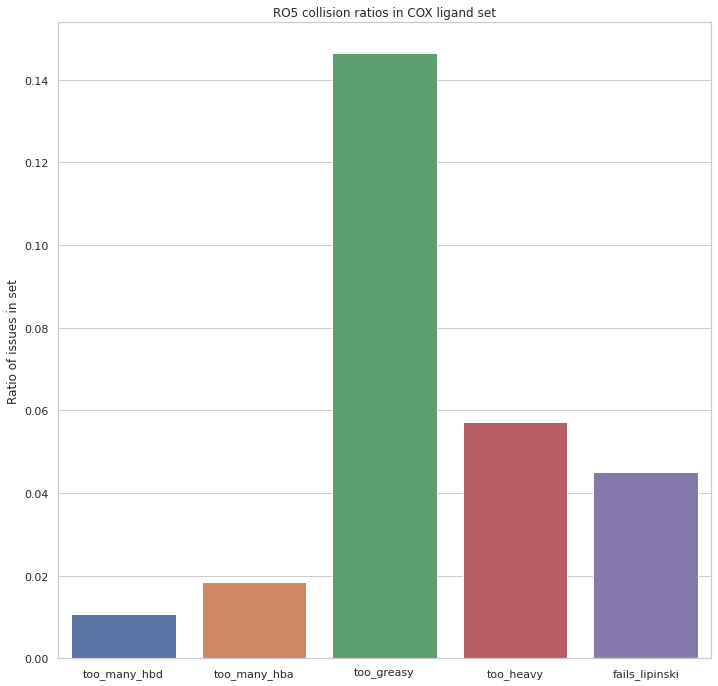

In [61]:
df_cox['fails_lipinski'] = cox_violates_lipinski
with sns.axes_style("whitegrid"):
    p = sns.barplot(data=df_cox, ci=None)
    p.set_title("RO5 collision ratios in COX ligand set")
    p.set_ylabel("Ratio of issues in set")

Chcete-li získat komplexnější obrázek, implementujeme některé další, abychom získali komplexnější obrázek. Udělejme rozšíření Ghose, které přeměňuje požadavky na logP a molekulovou hmotnost a místo HBA a HBD používá molární refraktivitu a počet atomů. Také Veberovo pravidlo o otočných vazbách a polárním povrchu:

In [63]:
from rdkit.Chem import Crippen

def bad_greasyness_ghose(mol):
    logp = Descriptors.MolLogP(mol)
    return logp > 5.6 or logp < -0.4

# let's apply the filters and add them to the dataframe as we go
df_cox['odd_greasyness'] = [bad_greasyness_ghose(l) for l in cox_ligands]

def bad_refractivity_ghose(mol):
    ref = Crippen.MolMR(mol)
    return ref > 130 or ref < 40
df_cox['odd_refractivity'] = [bad_refractivity_ghose(l) for l in cox_ligands]

def bad_mw_ghose(mol):
    mw = rdescriptors.CalcExactMolWt(mol)
    return mw > 480 or mw < 180
df_cox['odd_mass'] = [bad_mw_ghose(l) for l in cox_ligands]

def bad_atomcount_ghose(mol):
    ac = mol.GetNumHeavyAtoms()
    return ac > 70 or ac < 20
df_cox['odd_atomcount'] = [bad_atomcount_ghose(l) for l in cox_ligands]

def violates_ghose(mol):
    return bad_greasyness_ghose(mol) or bad_refractivity_ghose(mol) or bad_mw_ghose(mol) or bad_atomcount_ghose(mol)
df_cox['fails_ghose'] = [violates_ghose(l) for l in cox_ligands]

def too_rotatable_veber(mol):
    return Chem.CalcNumRotatableBonds(mol) > 10
df_cox['too_rotatable'] = [too_rotatable_veber(l) for l in cox_ligands]

def too_large_psa_veber(mol):
    return rdescriptors.CalcTPSA(mol) > 140
df_cox['excessive_psa'] = [too_large_psa_veber(l) for l in cox_ligands]

def violates_veber(mol):
    return too_rotatable_veber(mol) or too_large_psa_veber(mol)
df_cox['fails_veber'] = [violates_veber(l) for l in cox_ligands]

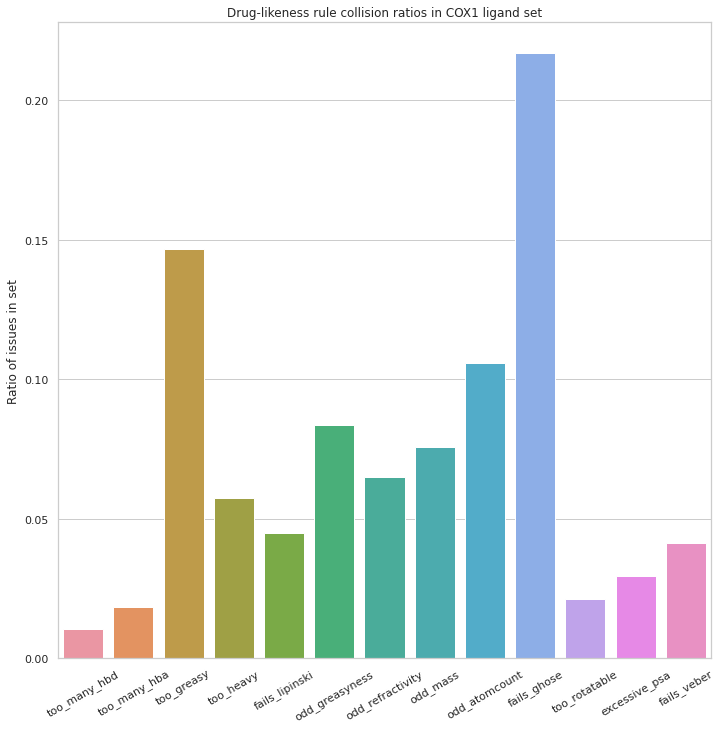

In [64]:
with sns.axes_style("whitegrid"):
    p = sns.barplot(data=df_cox, ci=None)
    p.set_title("Drug-likeness rule collision ratios in COX1 ligand set")
    p.set_ylabel("Ratio of issues in set")
    p.set_xticklabels(p.get_xticklabels(), rotation=30) # avoid ugly text clipping

Lehce přes 20 % ligandů COX1 selhalo v Ghoseovém filtru na špatný počet atomů  a a pak na logP0, jak bylo vidět dříve u Lipinski RO5. 
Pokud jde o Veberova pravidla, tak tam je opravdu malé procento molekul, což asi znamená, že jedna nebo dvě molekuly porušují Veberova pravidla

Vyapdá jako použitelná množina pro drogy.

Také by bylo dobré dát hodnoty do určité perspektivy. Dokonce i DrugBank obsahuje určité množství struktur, které jsou mimo hranice podobnosti s drogami, některé jednoduše proto, že pravidla jsou docela hrubé nástroje, jiné mohou být látkami, které se mohou spoléhat na aktivní transport v organismu, a podobně [inzulín] (https: / /www.drugbank.ca/categories/DBCAT000170) jednoduše nejsou určeny k perorálnímu podání. Pojďme získat statistiky pro DrugBank:

In [98]:
with open('../data/chembl_mtor_ic50.csv', 'r') as csvfile:
    reader = csv.DictReader(csvfile, delimiter=";")
    mtor_ligands = [Chem.MolFromSmiles(m['Smiles']) for m in reader]


In [99]:
df_mtor = pd.DataFrame(
    data={'set':'mtor',
          'too_many_hbd': [too_many_hbd(l) for l in mtor_ligands],
          'too_many_hba': [too_many_hba(l) for l in mtor_ligands],
          'too_greasy': [too_greasy(l) for l in mtor_ligands],
          'too_heavy': [too_heavy(l) for l in mtor_ligands],
          'fails_lipinski': [violates_lipinski(l) for l in mtor_ligands],
          'odd_greasyness': [bad_greasyness_ghose(l) for l in mtor_ligands],
          'odd_refractivity': [bad_refractivity_ghose(l) for l in mtor_ligands],
          'odd_mass': [bad_mw_ghose(l) for l in mtor_ligands],
          'odd_atomcount': [bad_atomcount_ghose(l) for l in mtor_ligands],
          'fails_ghose': [violates_ghose(l) for l in mtor_ligands],
          'too_rotatable': [too_rotatable_veber(l) for l in mtor_ligands],
          'excessive_psa': [too_large_psa_veber(l) for l in mtor_ligands],
          'fails_veber': [violates_veber(l) for l in mtor_ligands]})
df_mtor

,set,too_many_hbd,too_many_hba,too_greasy,too_heavy,fails_lipinski,odd_greasyness,odd_refractivity,odd_mass,odd_atomcount,fails_ghose,too_rotatable,excessive_psa,fails_veber
0,mtor,False,False,False,False,False,False,False,False,False,False,False,False,False
1,mtor,False,False,False,False,False,False,False,False,False,False,False,False,False
2,mtor,False,False,False,False,False,False,False,False,False,False,False,False,False
3,mtor,False,False,False,False,False,False,False,False,False,False,False,False,False
4,mtor,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4591,mtor,False,False,False,False,False,False,False,False,False,False,False,False,False
4592,mtor,False,False,False,False,False,False,False,False,False,False,False,False,False
4593,mtor,False,False,False,False,False,False,False,False,False,False,False,False,False
4594,mtor,False,False,False,False,False,False,False,False,False,False,False,False,False


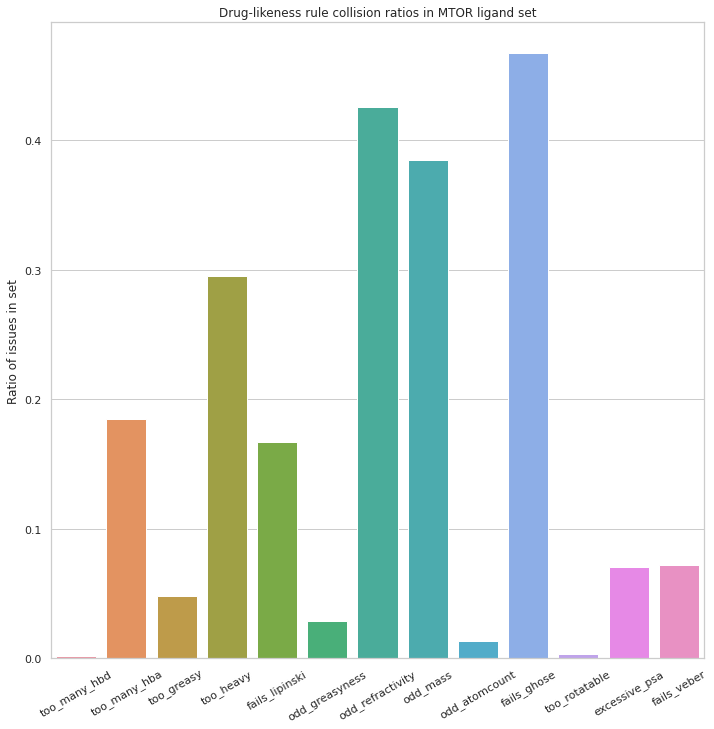

In [100]:
with sns.axes_style("whitegrid"):
    p = sns.barplot(data=df_mtor, ci=None)
    p.set_title("Drug-likeness rule collision ratios in MTOR ligand set")
    p.set_ylabel("Ratio of issues in set")
    p.set_xticklabels(p.get_xticklabels(), rotation=30) # avoid ugly text clipping

In [108]:
df_drugbank = pd.DataFrame(
    data={'set':'drug_bank',
          'too_many_hbd': [too_many_hbd(l) for l in drugs],
          'too_many_hba': [too_many_hba(l) for l in drugs],
          'too_greasy': [too_greasy(l) for l in drugs],
          'too_heavy': [too_heavy(l) for l in drugs],
          'fails_lipinski': [violates_lipinski(l) for l in drugs],
          'odd_greasyness': [bad_greasyness_ghose(l) for l in drugs],
          'odd_refractivity': [bad_refractivity_ghose(l) for l in drugs],
          'odd_mass': [bad_mw_ghose(l) for l in drugs],
          'odd_atomcount': [bad_atomcount_ghose(l) for l in drugs],
          'fails_ghose': [violates_ghose(l) for l in drugs],
          'too_rotatable': [too_rotatable_veber(l) for l in drugs],
          'excessive_psa': [too_large_psa_veber(l) for l in drugs],
          'fails_veber': [violates_veber(l) for l in drugs]})
df_drugbank

,set,too_many_hbd,too_many_hba,too_greasy,too_heavy,fails_lipinski,odd_greasyness,odd_refractivity,odd_mass,odd_atomcount,fails_ghose,too_rotatable,excessive_psa,fails_veber
0,drug_bank,True,True,False,True,True,True,True,True,True,True,True,True,True
1,drug_bank,True,True,False,True,True,True,True,True,True,True,True,True,True
2,drug_bank,True,True,False,True,True,True,True,True,True,True,True,True,True
3,drug_bank,True,True,False,True,True,True,True,True,True,True,True,True,True
4,drug_bank,False,True,False,True,True,False,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7110,drug_bank,False,False,False,False,False,False,True,True,True,True,False,False,False
7111,drug_bank,False,False,False,False,False,True,False,False,False,True,False,True,True
7112,drug_bank,True,True,False,True,True,False,True,True,True,True,True,True,True
7113,drug_bank,False,False,False,False,False,False,False,False,False,False,True,False,True


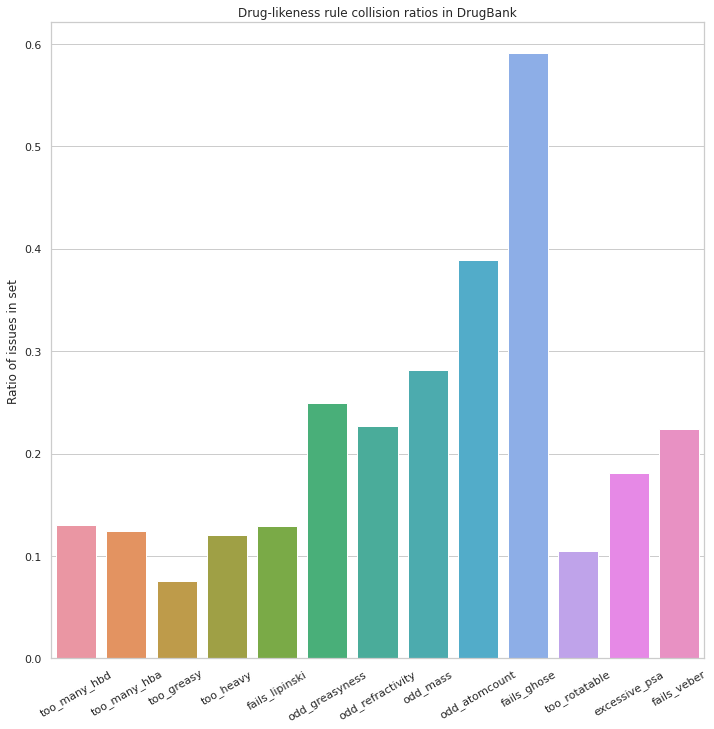

In [105]:
# let's visualize this monstrosity:
with sns.axes_style("whitegrid"):
    p = sns.barplot(data=df_drugbank, ci=None)
    p.set_title("Drug-likeness rule collision ratios in DrugBank")
    p.set_ylabel("Ratio of issues in set")
    p.set_xticklabels(p.get_xticklabels(), rotation=30) # avoid ugly text clipping

In [109]:
joint_all_df = pd.concat([df_mtor, df_drugbank,df_cox], ignore_index=True)
joint_all_df
joint_all_df['set'].unique()

array(['mtor', 'drug_bank', 'cox'], dtype=object)

In [162]:
melted_all_df1 = pd.melt(joint_all_df, id_vars=['set'], value_vars=['too_many_hbd','too_many_hba','too_greasy','too_heavy','fails_lipinski','odd_greasyness','odd_refractivity','odd_mass','odd_atomcount','fails_ghose','too_rotatable','excessive_psa','fails_veber'])
res = melted_all_df1.groupby(['set','variable']).sum()
display(melted_all_df1)

print(type(res))
res = (melted_all_df1.groupby(['set','variable']).sum()/ melted_all_df1.groupby(['set','variable']).count()).reset_index()
display(res)
#print(melted_all_df1['set'].unique())

,set,variable,value
0,mtor,too_many_hbd,False
1,mtor,too_many_hbd,False
2,mtor,too_many_hbd,False
3,mtor,too_many_hbd,False
4,mtor,too_many_hbd,False
...,...,...,...
193747,cox,fails_veber,False
193748,cox,fails_veber,False
193749,cox,fails_veber,False
193750,cox,fails_veber,False


<class 'pandas.core.frame.DataFrame'>


,set,variable,value
0,cox,excessive_psa,0.029439
1,cox,fails_ghose,0.217037
2,cox,fails_lipinski,0.045099
3,cox,fails_veber,0.041340
4,cox,odd_atomcount,0.105857
5,cox,odd_greasyness,0.083620
6,cox,odd_mass,0.075791
7,cox,odd_refractivity,0.064829
8,cox,too_greasy,0.146571
9,cox,too_heavy,0.057313


[Text(0, 0, 'excessive_psa'),
 Text(1, 0, 'fails_ghose'),
 Text(2, 0, 'fails_lipinski'),
 Text(3, 0, 'fails_veber'),
 Text(4, 0, 'odd_atomcount'),
 Text(5, 0, 'odd_greasyness'),
 Text(6, 0, 'odd_mass'),
 Text(7, 0, 'odd_refractivity'),
 Text(8, 0, 'too_greasy'),
 Text(9, 0, 'too_heavy'),
 Text(10, 0, 'too_many_hba'),
 Text(11, 0, 'too_many_hbd'),
 Text(12, 0, 'too_rotatable')]

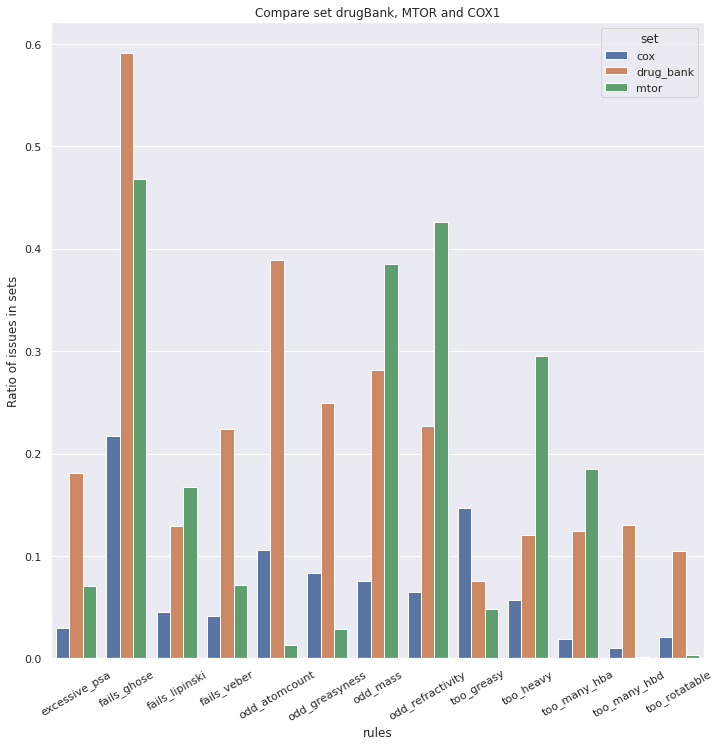

In [163]:
p = sns.barplot(y='value', x='variable',hue='set', data=res, ci=None)
p.set_title("Compare set drugBank, MTOR and COX1")
p.set_ylabel("Ratio of issues in sets")
p.set_xlabel("rules")
p.set_xticklabels(p.get_xticklabels(), rotation=30) # avoid ugly text clipping

Z grafu je vidět, že množina inhibitorů cox1 v porovnání s množinou sloučenin z DrugBanku a MTOR, nemá až tolik sloučenin, které by dané pravidla porušovaly, drugbank se dostává až na 60 %, kdy porušuje Ghose pravidla, m tor je těsně pod 50 % a cox je lehce nad 20 %, jak bylo řečeno dříve, tak má vyšší logP, což snad skoro jediné hledisko, kde převažuje, ale u ostatních se drží níže, než ostatní množiny.

### Přísnější pravidla

- podobné vlastnosti olovu

In [154]:
def strict_too_many_hbd(mol):
    # takes an RDKit mol instance, returns True if the structure is out of LRO5 bounds
    return rdescriptors.CalcNumLipinskiHBD(mol) > 3

def strict_too_many_hba(mol):
    return rdescriptors.CalcNumLipinskiHBA(mol) > 3

def strict_too_heavy(mol):
    return rdescriptors.CalcExactMolWt(mol) > 300

def strict_too_greasy(mol):
    return Descriptors.MolLogP(mol) > 3

def strict_too_roteble(mol):
    return rdescriptors.CalcNumRotatableBonds(mol) > 3

In [155]:
df_drugbank_strict = pd.DataFrame(
    data={'set':'drug_bank',
          'strict_too_many_hbd': [strict_too_many_hbd(l) for l in drugs],
          'strict_too_many_hba': [strict_too_many_hba(l) for l in drugs],
          'strict_too_greasy': [strict_too_greasy(l) for l in drugs],
          'strict_too_heavy': [strict_too_heavy(l) for l in drugs],
          'strict_too_rotable': [strict_too_heavy(l) for l in drugs],
          'fails_lipinski': [violates_lipinski(l) for l in drugs]})
df_drugbank_strict

,set,strict_too_many_hbd,strict_too_many_hba,strict_too_greasy,strict_too_heavy,strict_too_rotable,fails_lipinski
0,drug_bank,True,True,False,True,True,True
1,drug_bank,True,True,False,True,True,True
2,drug_bank,True,True,False,True,True,True
3,drug_bank,True,True,False,True,True,True
4,drug_bank,True,True,True,True,True,True
...,...,...,...,...,...,...,...
7110,drug_bank,False,False,False,False,False,False
7111,drug_bank,True,True,False,True,True,False
7112,drug_bank,True,True,False,True,True,True
7113,drug_bank,False,True,False,True,True,False


In [156]:
df_cox_strict = pd.DataFrame(
    data={'set':'cox',
          'strict_too_many_hbd': [strict_too_many_hbd(l) for l in cox_ligands],
          'strict_too_many_hba': [strict_too_many_hba(l) for l in cox_ligands],
          'strict_too_greasy': [strict_too_greasy(l) for l in cox_ligands],
          'strict_too_heavy': [strict_too_heavy(l) for l in cox_ligands],
          'strict_too_rotable': [strict_too_heavy(l) for l in cox_ligands],
          'fails_lipinski': [violates_lipinski(l) for l in cox_ligands]})
df_cox_strict

,set,strict_too_many_hbd,strict_too_many_hba,strict_too_greasy,strict_too_heavy,strict_too_rotable,fails_lipinski
0,cox,False,True,False,True,True,False
1,cox,False,True,False,True,True,False
2,cox,False,True,False,False,False,False
3,cox,False,True,True,True,True,False
4,cox,False,True,False,True,True,False
...,...,...,...,...,...,...,...
3188,cox,False,False,True,True,True,False
3189,cox,False,True,True,True,True,True
3190,cox,False,True,True,True,True,False
3191,cox,False,True,True,True,True,False


In [157]:
joint_all_df_strict = pd.concat([df_drugbank_strict,df_cox_strict], ignore_index=True)
melted_all_df_strict = pd.melt(joint_all_df_strict, id_vars=['set'], value_vars=['strict_too_many_hbd','strict_too_many_hba','strict_too_greasy','strict_too_heavy','fails_lipinski','strict_too_rotable'])

#print(type(res))
res_strict = (melted_all_df_strict.groupby(['set','variable']).sum()/ melted_all_df_strict.groupby(['set','variable']).count()).reset_index()
display(res_strict)

,set,variable,value
0,cox,fails_lipinski,0.045099
1,cox,strict_too_greasy,0.770122
2,cox,strict_too_heavy,0.851863
3,cox,strict_too_many_hba,0.765424
4,cox,strict_too_many_hbd,0.033511
5,cox,strict_too_rotable,0.851863
6,drug_bank,fails_lipinski,0.129585
7,drug_bank,strict_too_greasy,0.335207
8,drug_bank,strict_too_heavy,0.577231
9,drug_bank,strict_too_many_hba,0.770344


[Text(0, 0, 'fails_lipinski'),
 Text(1, 0, 'strict_too_greasy'),
 Text(2, 0, 'strict_too_heavy'),
 Text(3, 0, 'strict_too_many_hba'),
 Text(4, 0, 'strict_too_many_hbd'),
 Text(5, 0, 'strict_too_rotable')]

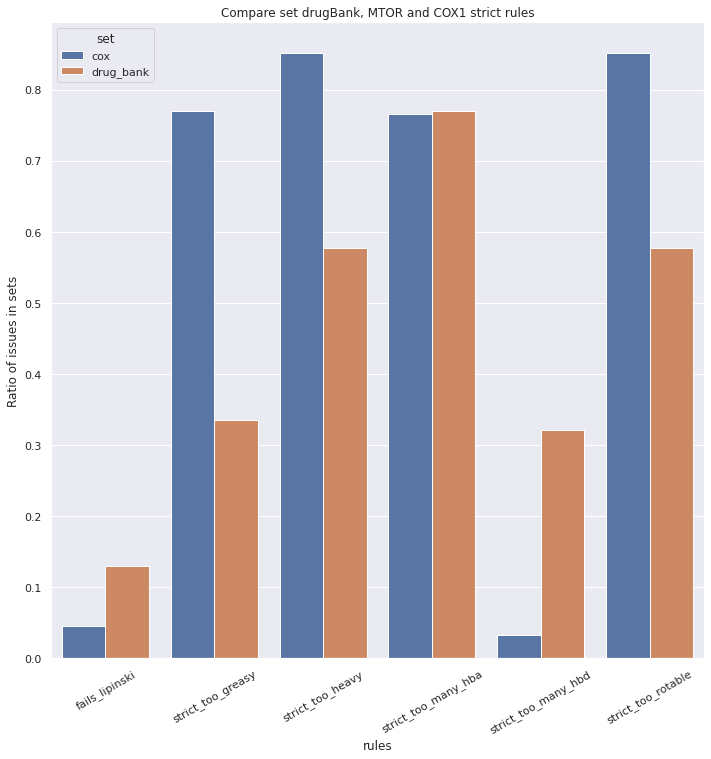

In [159]:
p = sns.barplot(y='value', x='variable',hue='set', data=res_strict, ci=None)
p.set_title("Compare set drugBank, MTOR and COX1 strict rules")
p.set_ylabel("Ratio of issues in sets")
p.set_xlabel("rules")
p.set_xticklabels(p.get_xticklabels(), rotation=30) # avoid ugly text clipping

Inhibitory COX1 dopadly v porušení přísnějších pravidel hůře, ale zase obecně těch pravidel neporušují tolik najednou v porovnání se sloučeninama s DrugBank. Jedině, kde je na tom dobře, jsou donory vodíkových vazeb, tam mají málo sloučenin, které porušují toto pravidlo. Jinak ve velkém množství překračují váhu, mají mnoho rotovatelných vazeb a mají vyšší logP.